In [1]:
#!pip install xgboost

In [2]:
#!pip install lightgbm

# EDA

In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore',category=FutureWarning)

In [50]:
data = pd.read_csv('Titanic_train2.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [51]:
data.describe()  #describing data

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [52]:
data.shape

(891, 12)

In [53]:
data.dtypes   #type of data

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [54]:
data.isnull().sum() #finding null values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [55]:
data.nunique()  #unique values

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [56]:
data['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [57]:
data['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [58]:
data['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [59]:
data['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [60]:
# preprocess the data
# droping columns those are not needed for prediction
data.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace = True)

In [61]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [75]:
# Feature list
features = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
titles = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

### Histogram

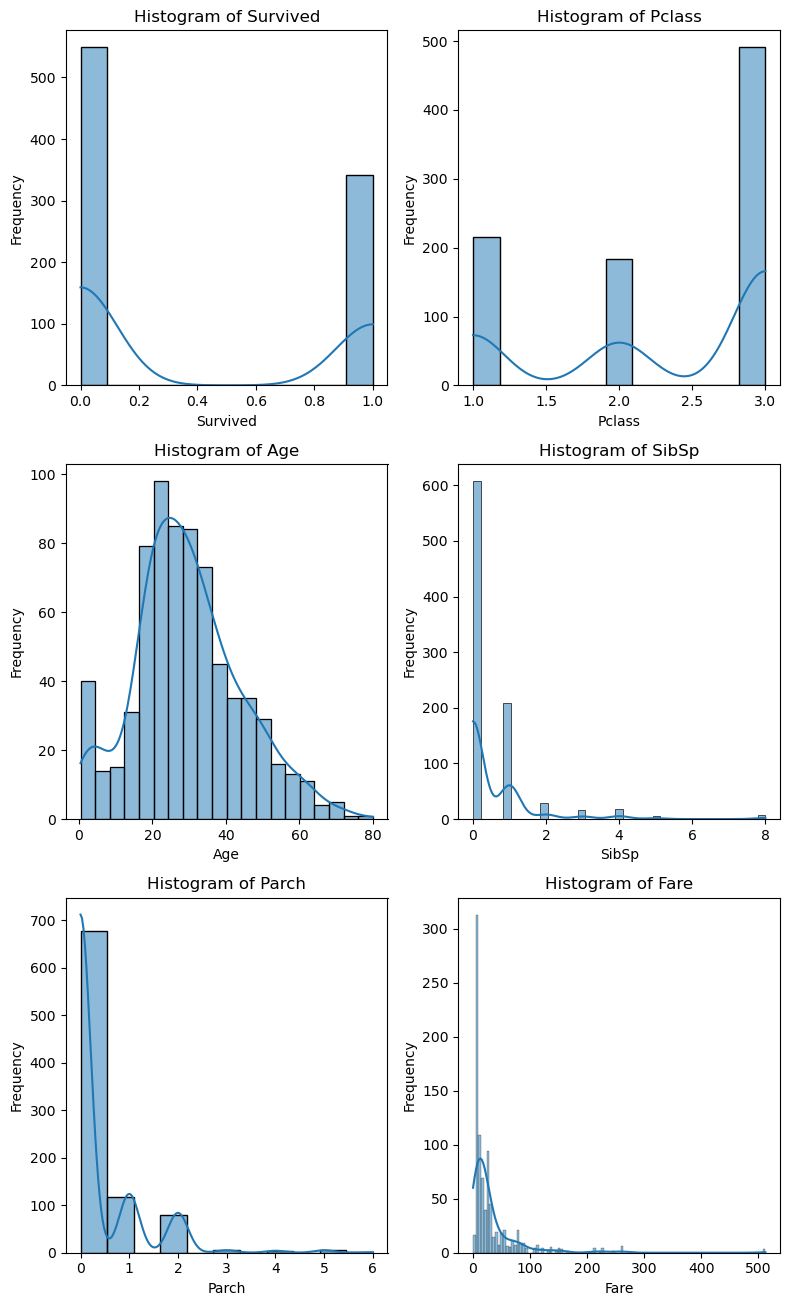

In [76]:
fig, axes = plt.subplots(3, 2, figsize=(8, 14))  # Adjust the size as needed
for i, column in enumerate(features):
    sns.histplot(data[column], kde=True, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(f'Histogram of {column}')
    axes[i//2, i%2].set_xlabel(column)
    axes[i//2, i%2].set_ylabel('Frequency')

plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()

### Boxplot

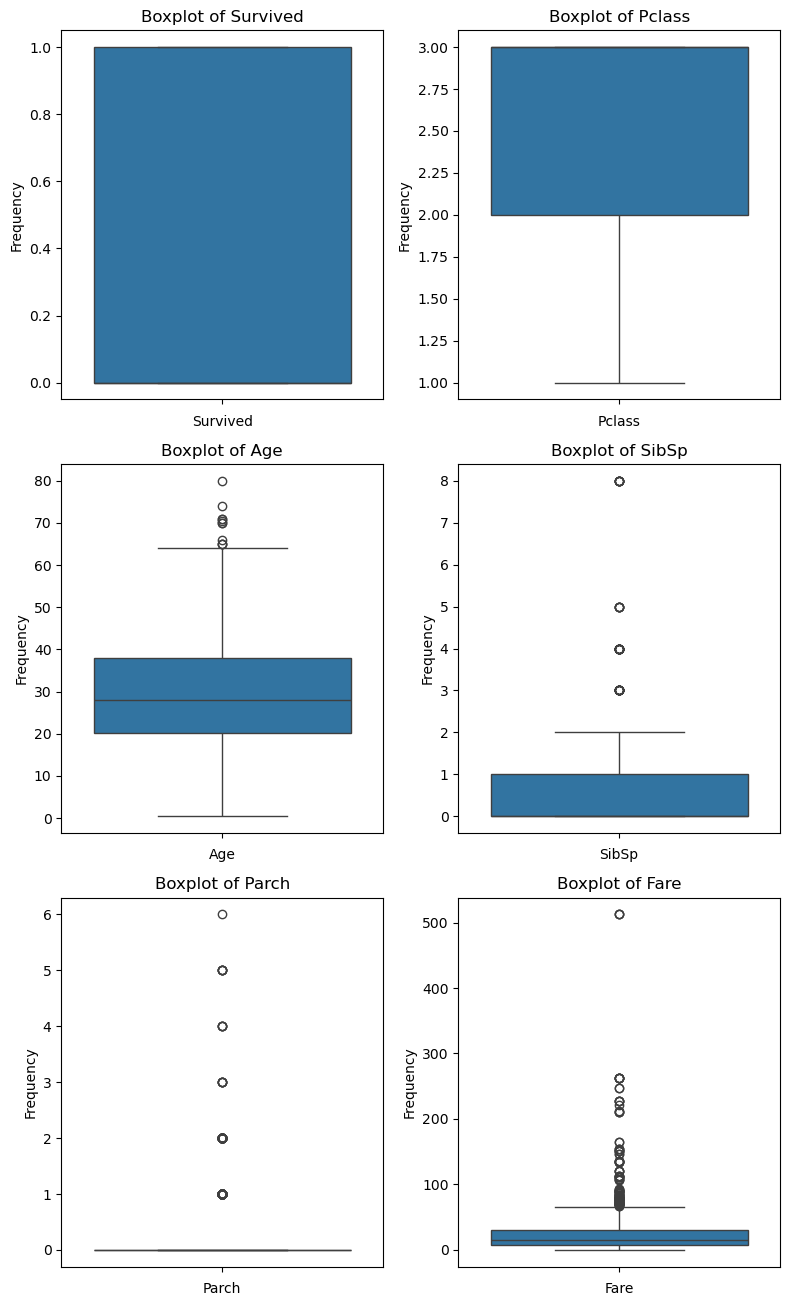

In [77]:
fig, axes = plt.subplots(3, 2, figsize=(8, 14))  # Adjust the size as needed
for i, column in enumerate(titles):
    sns.boxplot(data[column],ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(f'Boxplot of {column}')
    axes[i//2, i%2].set_xlabel(column)
    axes[i//2, i%2].set_ylabel('Frequency')

plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()

### Scatterplot

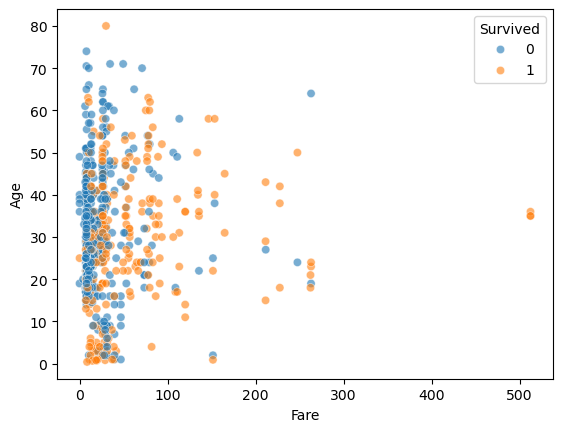

In [17]:
sns.scatterplot(x='Fare', y='Age', hue='Survived', data=data, alpha=0.6)
plt.show()

### Boxplot

<Figure size 1000x600 with 0 Axes>

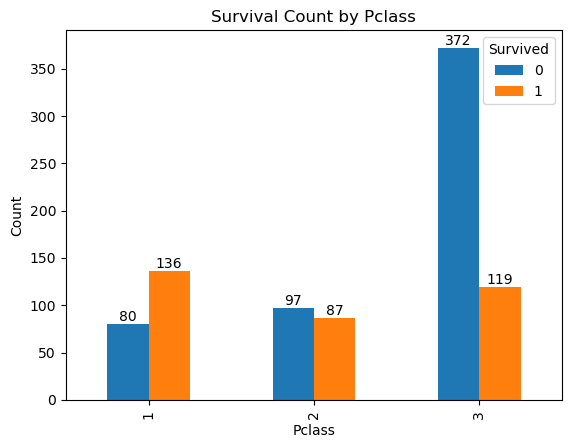

In [18]:
ct1 = pd.crosstab(data.Pclass, data.Survived)
plt.figure(figsize=(10, 6))
ax1 = ct1.plot(kind='bar')
plt.title('Survival Count by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Count')

for container in ax1.containers:  # Adding data labels
    ax1.bar_label(container)

plt.show()

<Figure size 1000x600 with 0 Axes>

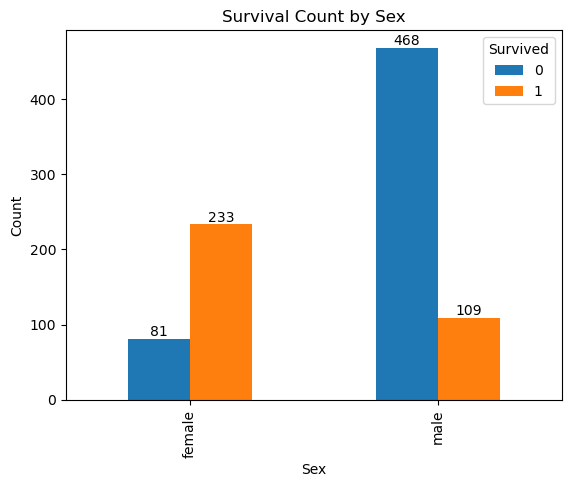

In [19]:
ct1 = pd.crosstab(data.Sex, data.Survived)
plt.figure(figsize=(10, 6))
ax1 = ct1.plot(kind='bar')
plt.title('Survival Count by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')

for container in ax1.containers:  # Adding data labels
    ax1.bar_label(container)

plt.show()

<Figure size 1000x600 with 0 Axes>

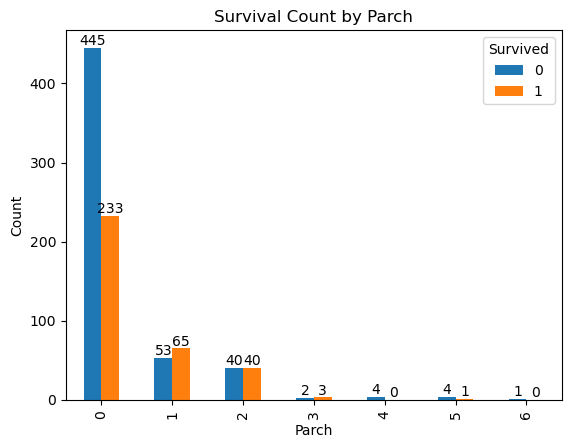

In [20]:
ct1 = pd.crosstab(data.Parch, data.Survived)
plt.figure(figsize=(10, 6))
ax1 = ct1.plot(kind='bar')
plt.title('Survival Count by Parch')
plt.xlabel('Parch')
plt.ylabel('Count')

for container in ax1.containers:  # Adding data labels
    ax1.bar_label(container)

plt.show()

<Figure size 1000x600 with 0 Axes>

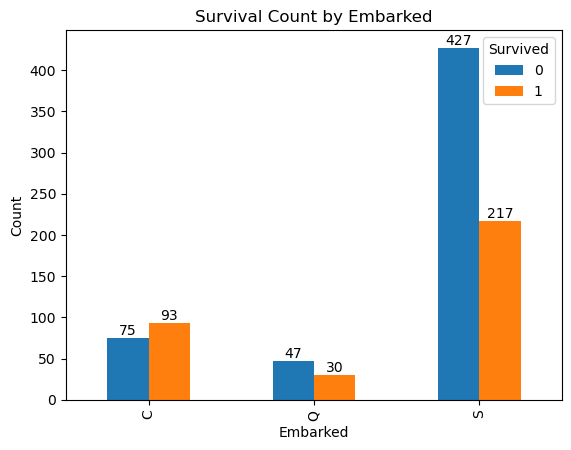

In [21]:
ct1 = pd.crosstab(data.Embarked, data.Survived)
plt.figure(figsize=(10, 6))
ax1 = ct1.plot(kind='bar')
plt.title('Survival Count by Embarked')
plt.xlabel('Embarked')
plt.ylabel('Count')

for container in ax1.containers:  # Adding data labels
    ax1.bar_label(container)

plt.show()

In [22]:
data.corr(numeric_only=True)

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


# Data Preprocessing

In [23]:
# preprocess the data
# Handle missing values
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

In [24]:
# Convert categorical variables into dummy/indicator variables
# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Apply label encoding to each categorical column
for column in data.select_dtypes(include=['object']).columns:
    data[column] = label_encoder.fit_transform(data[column])
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [25]:
scaler = MinMaxScaler()

# Fit and transform the specified columns
data[['Age','Fare']] = scaler.fit_transform(data[['Age','Fare']])

In [26]:
# Convert categorical variables into dumm variables
data = pd.get_dummies(data, columns=['Sex', 'Embarked'], drop_first=True,dtype= float)
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_1,Embarked_1,Embarked_2
0,0,3,0.271174,1,0,0.014151,1.0,0.0,1.0
1,1,1,0.472229,1,0,0.139136,0.0,0.0,0.0
2,1,3,0.321438,0,0,0.015469,0.0,0.0,1.0
3,1,1,0.434531,1,0,0.103644,0.0,0.0,1.0
4,0,3,0.434531,0,0,0.015713,1.0,0.0,1.0


# Building Predictive Models

In [27]:
#split the data
X = data.iloc[:,1:]
y = data.iloc[:,0]

In [28]:
#split into Traing and testing
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.2,random_state= 41)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((712, 8), (179, 8), (712,), (179,))

## XGBOOST

In [29]:
model = xgb.XGBClassifier(subsample=0.5, objective='multi:softmax')

In [30]:
# Determine the number of unique classes
num_classes = len(set(y_train))
# Define the parameter grid
params = {
    'n_estimators': [24,25,26,28],
    'max_depth': [4,12,14,16],
    'learning_rate': [0.1, 0.01, 0.001],
    'eval_metric': ['logloss', 'mlogloss', 'merror', 'error'],
    'num_class': [num_classes]}

grd = GridSearchCV(estimator=model, param_grid=params, scoring='accuracy', cv=5)
grd.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     objective='multi:softmax', ...),
             param_grid={'eval_metric': ['logloss', 'mlogloss', 'merror',
                                         'error'],
                         'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [4, 12, 14, 16],
                         'n_estimators': [24, 25, 26, 28], 'num_class': [2]},
             scoring='accuracy')

In [31]:
grd.best_params_   # best parameter

{'eval_metric': 'logloss',
 'learning_rate': 0.1,
 'max_depth': 14,
 'n_estimators': 26,
 'num_class': 2}

In [32]:
final_model = grd.best_estimator_     # best parameter selected for model

In [33]:
yhat_train = final_model.predict(X_train)         # for training dataset
cm = confusion_matrix(y_train,yhat_train)
print(cm)
print(classification_report(y_train,yhat_train))

[[425  19]
 [ 46 222]]
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       444
           1       0.92      0.83      0.87       268

    accuracy                           0.91       712
   macro avg       0.91      0.89      0.90       712
weighted avg       0.91      0.91      0.91       712



In [34]:
yhat_test = final_model.predict(X_test)         # for testing dataset
cm = confusion_matrix(y_test,yhat_test)
print(cm)
print(classification_report(y_test,yhat_test))

[[100   5]
 [ 22  52]]
              precision    recall  f1-score   support

           0       0.82      0.95      0.88       105
           1       0.91      0.70      0.79        74

    accuracy                           0.85       179
   macro avg       0.87      0.83      0.84       179
weighted avg       0.86      0.85      0.85       179



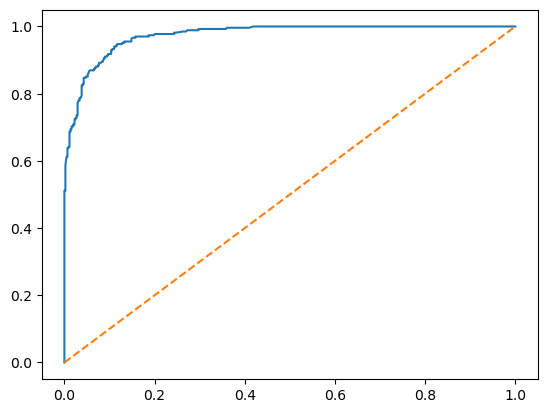

0.8927827080812155


In [35]:
ytrain_proba =  final_model.predict_proba(X_train)[:,1]
fpr, tpr, thresh = roc_curve(y_train,ytrain_proba)
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],linestyle='dashed')
plt.show()
auc = roc_auc_score(y_train,yhat_train)
print(auc)

## LightGBM

In [36]:
# Define the parameter grid
params = {
    'n_estimators': [50, 100],
    'max_depth': [4, 8, 12],
    'learning_rate': [0.1, 0.01],
    'num_leaves': [31, 50],
    'boosting_type': ['gbdt'],
    'objective': ['binary'],
    'metric': ['binary_logloss'],
    'subsample': [0.8, 1.0],
    'max_bin': [127, 255]
}

# Initialize the LightGBM model
model = lgb.LGBMClassifier()

# Initialize GridSearchCV 
grd = GridSearchCV(estimator=model, param_grid=params, scoring='accuracy', cv=3)

# Fit the model
grd.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 178, number of negative: 296
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000579 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 197
[LightGBM] [Info] Number of data points in the train set: 474, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.375527 -> initscore=-0.508576
[LightGBM] [Info] Start training from score -0.508576
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


GridSearchCV(cv=3, estimator=LGBMClassifier(),
             param_grid={'boosting_type': ['gbdt'],
                         'learning_rate': [0.1, 0.01], 'max_bin': [127, 255],
                         'max_depth': [4, 8, 12], 'metric': ['binary_logloss'],
                         'n_estimators': [50, 100], 'num_leaves': [31, 50],
                         'objective': ['binary'], 'subsample': [0.8, 1.0]},
             scoring='accuracy')

In [37]:
grd.best_params_   # best parameter

{'boosting_type': 'gbdt',
 'learning_rate': 0.1,
 'max_bin': 255,
 'max_depth': 4,
 'metric': 'binary_logloss',
 'n_estimators': 100,
 'num_leaves': 31,
 'objective': 'binary',
 'subsample': 0.8}

In [38]:
final_model2 = grd.best_estimator_     # best parameter selected for model

In [39]:
yhat_train = final_model2.predict(X_train)         # for training dataset
cm = confusion_matrix(y_train,yhat_train)
print(cm)
print(classification_report(y_train,yhat_train))

[[423  21]
 [ 58 210]]
              precision    recall  f1-score   support

           0       0.88      0.95      0.91       444
           1       0.91      0.78      0.84       268

    accuracy                           0.89       712
   macro avg       0.89      0.87      0.88       712
weighted avg       0.89      0.89      0.89       712



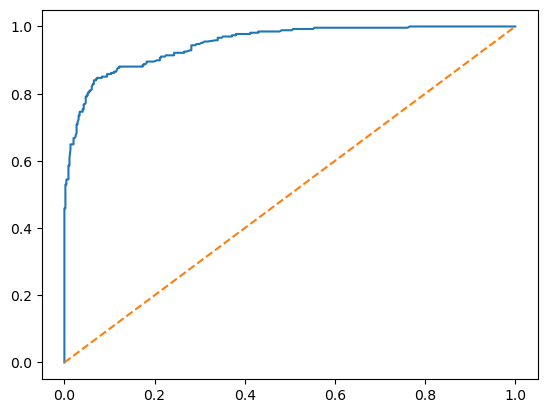

0.8681423961274709


In [40]:
ytrain_proba =  final_model2.predict_proba(X_train)[:,1]
fpr, tpr, thresh = roc_curve(y_train,ytrain_proba)
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],linestyle='dashed')
plt.show()
auc = roc_auc_score(y_train,yhat_train)
print(auc)

In [41]:
yhat_test = final_model2.predict(X_test)         # for testing dataset
cm = confusion_matrix(y_test,yhat_test)
print(cm)
print(classification_report(y_test,yhat_test))

[[99  6]
 [23 51]]
              precision    recall  f1-score   support

           0       0.81      0.94      0.87       105
           1       0.89      0.69      0.78        74

    accuracy                           0.84       179
   macro avg       0.85      0.82      0.83       179
weighted avg       0.85      0.84      0.83       179



XGBoost (XGBM):
Strengths:
High precision, recall, and F1-score on both training and test data, especially for class 0.
High overall accuracy on both training (0.91) and test data (0.85).
Weaknesses:
Slightly lower recall for class 1 on the test data (0.70), indicating some false negatives.
Shows a degree of overfitting, as indicated by the drop in accuracy from training to test data.

LightGBM (LGBM):
Strengths:
Good precision, recall, and F1-score on both training and test data, particularly for class 0.
High overall accuracy on both training (0.89) and test data (0.84).
Weaknesses:
Lower recall for class 1 on the training data (0.78) and test data (0.69), indicating potential false negatives.
Performance metrics are slightly lower compared to XGBoost, especially for class 1.

# On Testing Dataset

In [42]:
test = pd.read_csv('Titanic_test2.csv') # read the data
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [43]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_1,Embarked_1,Embarked_2
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.363679,0.523008,0.381594,0.062858,0.647587,0.086420,0.725028
std,0.486592,0.836071,0.163605,1.102743,0.806057,0.096995,0.477990,0.281141,0.446751
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.271174,0.000000,0.000000,0.015440,0.000000,0.000000,0.000000
50%,0.000000,3.000000,0.346569,0.000000,0.000000,0.028213,1.000000,0.000000,1.000000
75%,1.000000,3.000000,0.434531,1.000000,0.000000,0.060508,1.000000,0.000000,1.000000
max,1.000000,3.000000,1.000000,8.000000,6.000000,1.000000,1.000000,1.000000,1.000000


In [44]:
data.dtypes

Survived        int64
Pclass          int64
Age           float64
SibSp           int64
Parch           int64
Fare          float64
Sex_1         float64
Embarked_1    float64
Embarked_2    float64
dtype: object

In [45]:
test.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)  # drop the unwanted columns
test['Age'].fillna(test['Age'].median(), inplace=True)
test['Fare'].fillna(test['Fare'].median(), inplace=True)                 # imputation
test['Embarked'].fillna(test['Embarked'].mode()[0], inplace=True)

In [46]:
# Convert categorical variables into dummy/indicator variables
test= pd.get_dummies(test, columns=['Sex', 'Embarked'], drop_first=True,dtype= float)
test.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,34.5,0,0,7.8292,1.0,1.0,0.0
1,3,47.0,1,0,7.0000,0.0,0.0,1.0
2,2,62.0,0,0,9.6875,1.0,1.0,0.0
3,3,27.0,0,0,8.6625,1.0,0.0,1.0
4,3,22.0,1,1,12.2875,0.0,0.0,1.0


In [47]:
pred_test = final_model2.predict(test)        # pre testing dataset
pred_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [48]:
# Convert pred_test to a DataFrame 
pred_test_df = pd.DataFrame(pred_test, columns=['Prediction'])
test_with_predictions = test.copy()  #  copy of the test DataFrame
test_with_predictions['Prediction'] = pred_test_df
test_with_predictions.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Prediction
0,3,34.5,0,0,7.8292,1.0,1.0,0.0,0
1,3,47.0,1,0,7.0000,0.0,0.0,1.0,0
2,2,62.0,0,0,9.6875,1.0,1.0,0.0,0
3,3,27.0,0,0,8.6625,1.0,0.0,1.0,0
4,3,22.0,1,1,12.2875,0.0,0.0,1.0,0


In [49]:
test_with_predictions['Prediction'].value_counts() # unique counts for survival and not survival

Prediction
0    338
1     80
Name: count, dtype: int64

In [50]:
grp=test_with_predictions.groupby('Prediction')  #group by prediction
grp             # it shows only object it will be just stored somewhere

In [51]:
for x,y in grp:       # group by 
    print(x,y)
    print('-'*60)     # result predictionwise 0 and 1

0      Pclass   Age  SibSp  Parch     Fare  Sex_male  Embarked_Q  Embarked_S  \
0         3  34.5      0      0   7.8292       1.0         1.0         0.0   
1         3  47.0      1      0   7.0000       0.0         0.0         1.0   
2         2  62.0      0      0   9.6875       1.0         1.0         0.0   
3         3  27.0      0      0   8.6625       1.0         0.0         1.0   
4         3  22.0      1      1  12.2875       0.0         0.0         1.0   
..      ...   ...    ...    ...      ...       ...         ...         ...   
412       3  28.0      0      0   7.7750       0.0         0.0         1.0   
413       3  27.0      0      0   8.0500       1.0         0.0         1.0   
415       3  38.5      0      0   7.2500       1.0         0.0         1.0   
416       3  27.0      0      0   8.0500       1.0         0.0         1.0   
417       3  27.0      1      1  22.3583       1.0         0.0         0.0   

     Prediction  
0             0  
1             0  
2      

# Comparative Analysis

In [52]:
#For XGBoost

In [53]:
yhat_test = final_model.predict(X_test)         # for testing dataset
cm = confusion_matrix(y_test,yhat_test)
print(cm)
print(classification_report(y_test,yhat_test))

[[100   5]
 [ 22  52]]
              precision    recall  f1-score   support

           0       0.82      0.95      0.88       105
           1       0.91      0.70      0.79        74

    accuracy                           0.85       179
   macro avg       0.87      0.83      0.84       179
weighted avg       0.86      0.85      0.85       179



In [54]:
#For LightGBM

In [55]:
yhat_test = final_model2.predict(X_test)         # for testing dataset
cm = confusion_matrix(y_test,yhat_test)
print(cm)
print(classification_report(y_test,yhat_test))

[[99  6]
 [23 51]]
              precision    recall  f1-score   support

           0       0.81      0.94      0.87       105
           1       0.89      0.69      0.78        74

    accuracy                           0.84       179
   macro avg       0.85      0.82      0.83       179
weighted avg       0.85      0.84      0.83       179



# Additional Reports

### LightGBM vs. XGBoost

LightGBM tends to be faster due to its leaf-wise splitting strategy and optimized histogram-based algorithms.
XGBoost offers more control over the boosting process with a variety of parameters.
Performance can vary depending on the dataset and specific problem.

### Handling Class Imbalance

Both LightGBM and XGBoost support handling class imbalance through parameters like scale_pos_weight in XGBoost and is_unbalance in LightGBM.
Additionally, techniques such as oversampling, undersampling, or using SMOTE can be applied before training the